<a href="https://colab.research.google.com/github/ryzerrv2/UNISA/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
8


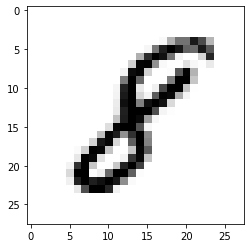

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap="Greys")

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2128 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0846 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0588 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0303 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0208 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 42s 23m

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0682 - accuracy: 0.9836


[0.06819640845060349, 0.9836000204086304]

1/1 [==============================] - 0s 25ms/step
6


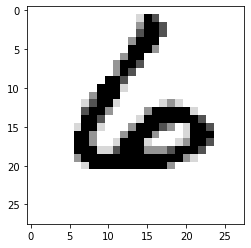

In [45]:
image_index = 5755
plt.imshow(x_test[image_index].reshape(28, 28), cmap="Greys")
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())